# EDA & Linear Regression Modeling

# Overview
In this notebook, an analysis and visualization of the data will be conducted. Two variables will then be isolated to evaluate correlation using a *linear regression* model.

## Abstract
Lorem ipsum...

# Section 1: Data Analysis

## Section 1.1: Data Parsing and Cleaning
In this section, the data will be parsed and stored as a Pandas *dataframe* object. Irrelevant information to the quantitative analysis will be omitted.

In [2]:
# IMPORT NECESSARY LIBS 
import pandas as pd                # For data parsing, CSV I/O
import matplotlib.pyplot as plt    # Data visualization
import seaborn as sns              # Data visualization but prettier lol
import datetime as dt              # DateTime objects for ease of manipulation

In [3]:
# Create a dataframe object by parsing the .csv file of the dataset
df = pd.read_csv('./data/ai_job_dataset.csv')

# Verify it is working by checking the first few rows
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

## Remarks: `df.info()`
- There are **0** non-null entries in the dataset
- Information such as `posting_date` and `application_deadline` can be converted as `DateTime` objects 
- I can see that there are a handful of columns that can be dropped 

In [5]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

In [6]:
columns_to_drop = ['job_id', 'salary_currency', 'job_description_length','company_name']
df.drop(columns=columns_to_drop,inplace=True)

In [7]:
# Verify the state of the dataframe, now with columns dropped inplace 
display(df.head())
display(df.info())
display(df.describe())

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score
0,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,5.9
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,5.2
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,9.4
3,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,8.6
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,6.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   job_title             15000 non-null  object        
 1   salary_usd            15000 non-null  int64         
 2   experience_level      15000 non-null  object        
 3   employment_type       15000 non-null  object        
 4   company_location      15000 non-null  object        
 5   company_size          15000 non-null  object        
 6   employee_residence    15000 non-null  object        
 7   remote_ratio          15000 non-null  int64         
 8   required_skills       15000 non-null  object        
 9   education_required    15000 non-null  object        
 10  years_experience      15000 non-null  int64         
 11  industry              15000 non-null  object        
 12  posting_date          15000 non-null  datetime64[ns]
 13  application_dead

None

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,benefits_score
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,7.504273
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,5.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,6.200000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,7.500000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,8.800000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,10.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,1.450870


## Section 1.2: Data Visualization
In this section, the distribution of the dataset is observed and visualized using *Seaborn*. This ensures the dataset is balanced and sufficiently varied.

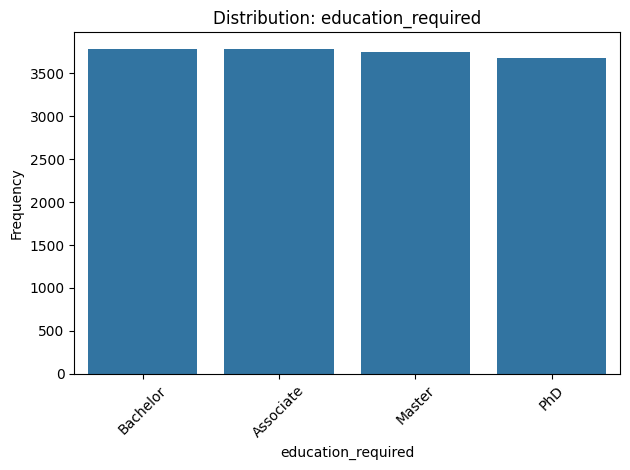

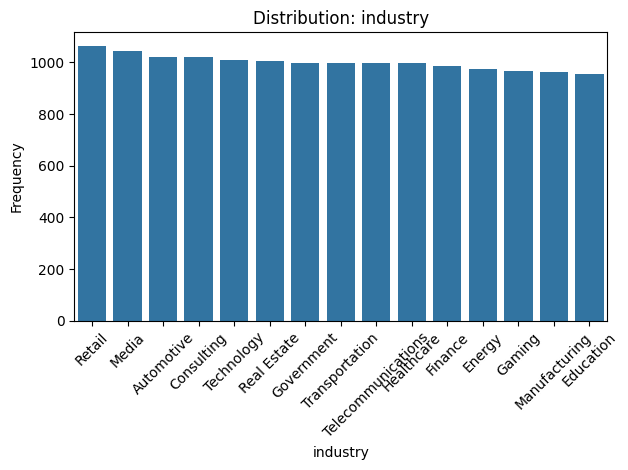

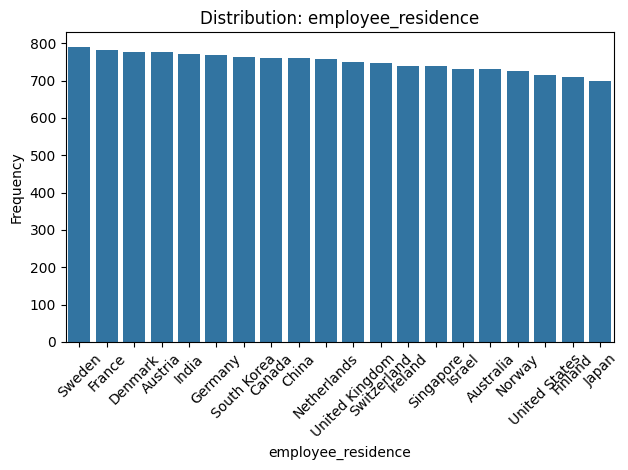

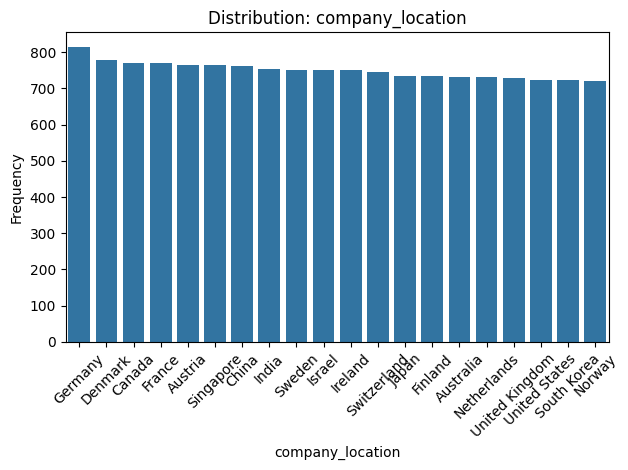

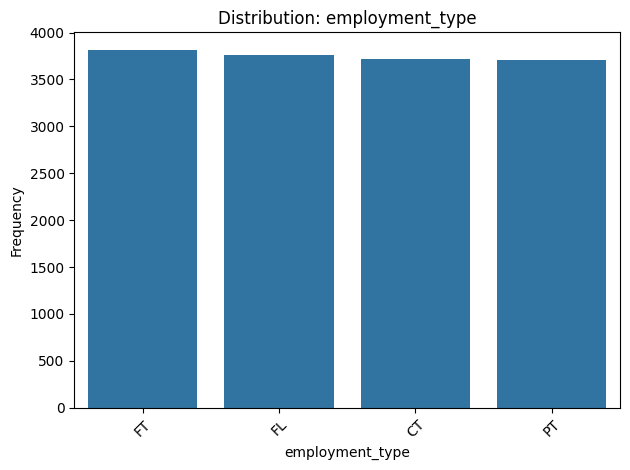

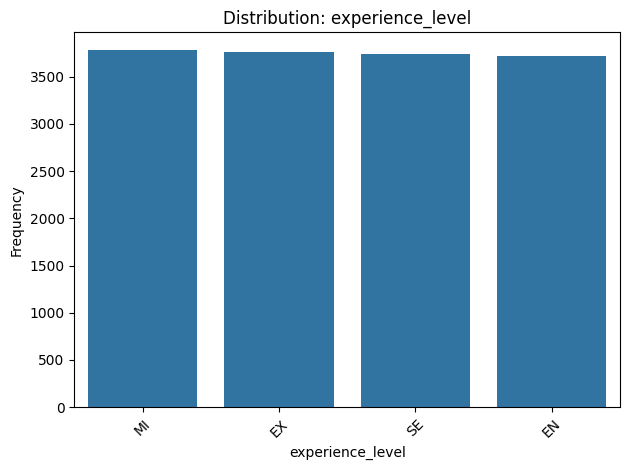

In [8]:
def plot_dist(df, column_name):
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot the following columns to observe distribution
categorical_columns = ['education_required', 'industry', 'employee_residence',
                       'company_location','employment_type','experience_level']

# Iterate through the array and plot them
for i in categorical_columns:
    plot_dist(df, i)


**Observation:** For the categorical columns, the distribution is uniform across the sample. So, that means there is no bias in the creation of this data set.

# Section 2: Linear Regression: Training
This section fits a linear regression model between two columns in the dataset. That way, we can conclude there are correlation given the relationship being observed.

## Section 2.1: Identifying Independent and Dependent Variables
This section identifies what two columns from the dataset will be used in the conduction of the linear regression analysis.

**Independent Variable (x): Years of experience**

**Dependent Variable (y): Salary**

Thus, this linear regression analysis will identify the correlation between years of experience and salary.

## Section 2.2: Data Visualization (Scatterplots)
This section visualizes the bivariate relationship with a scatter-plot. That is, given the years of experience, this is how much you could be paid for an AI job.

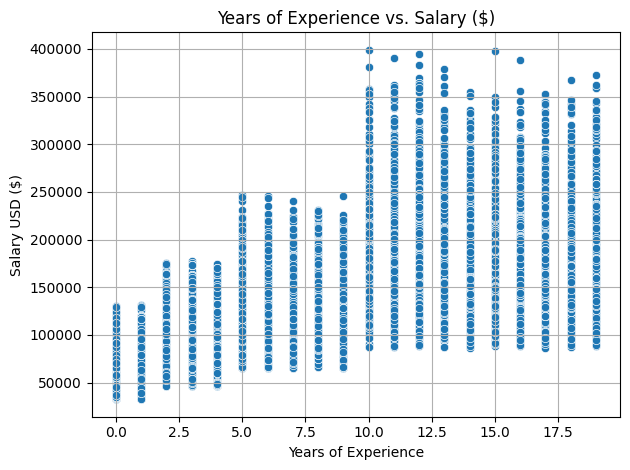

In [9]:
# Split IV and DV into Pandas Series
years_of_experience = df['years_experience']
salary = df['salary_usd']

# Seaborn for scatterplot: Entire sample
sns.scatterplot(x=years_of_experience,y=salary)
plt.title('Years of Experience vs. Salary ($)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary USD ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Section 2.3: Train/Test Split
In this section, we will be incorporating some machine learning models and practices by deploying a test and train data set for both the independent variable (IV) and dependent variable (DV)

In [47]:
# sklearn imports below to minimize jumping to the top and bottom of the notebook
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

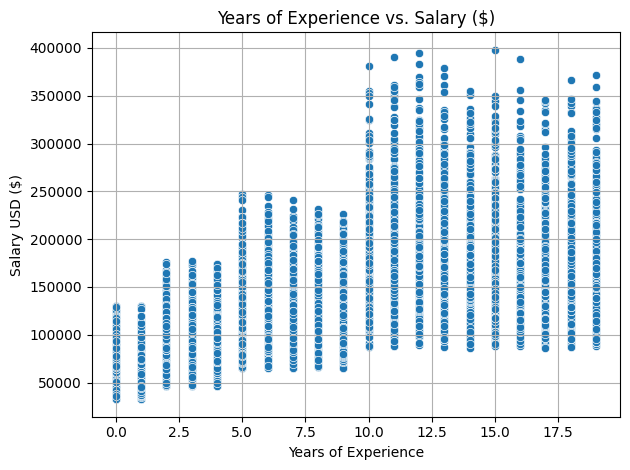

In [11]:
# Assigned variables x and y for brevity; may undo this...

x = years_of_experience
y = salary

# Call sklearn's train_test_split to randomly partition the IV and DV into a train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Visualize data via scatterplot: training dataset for Linear Regression model later...
sns.scatterplot(x=x_train,y=y_train)
plt.title('Years of Experience vs. Salary ($)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary USD ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Section 2.4: Linear Regression Model Fitment
In this section, a linear regression model is initialized and fit to our proposed bivariate relationship. The constant and slope can be derived to create a simple regression equation using the training dataset.

In [36]:
reg = LinearRegression()
reg.fit(x.to_frame(),y.to_frame())
print(f'Intercept: {reg.intercept_[0]}')
print(f'Slope: {reg.coef_[0][0]}')

Intercept: 65233.53161177158
Slope: 8014.3660080537575


**Linear Regression Equation (1 Feature)**
$$
\hat{y} = 8014.37 + 65233.53x
$$

The prediction is now going to train on the IV test dataset

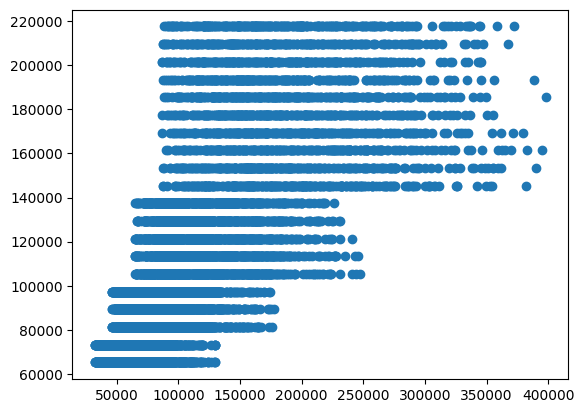

In [46]:
y_predict = reg.predict(x_train.to_frame())
plt.scatter(y_train, y_predict)